## Moving Average

A moving average, also called a rolling or running average, is used to analyze the time-series data by calculating averages of different subsets of the complete dataset. Since it involves taking the average of the dataset over time, it is also called a moving mean (MM) or rolling mean.

There are various ways in which the rolling average can be calculated, but one such way is to take a fixed subset from a complete series of numbers. The first moving average is calculated by averaging the first fixed subset of numbers, and then the subset is changed by moving forward to the next fixed subset (including the future value in the subgroup while excluding the previous number from the series).

The moving average is mostly used with time series data to capture the short-term fluctuations while focusing on longer trends.

A few examples of time series data can be stock prices, weather reports, air quality, gross domestic product, employment, etc.

In general, the moving average smoothens the data.

Moving average is a backbone to many algorithms, and one such algorithm is Autoregressive Integrated Moving Average Model (ARIMA), which uses moving averages to make time series data predictions.

There are various types of moving averages:

### 1.Simple Moving Average (SMA): 
Simple Moving Average (SMA) uses a sliding window to take the average over a set number of time periods. It is an equally weighted mean of the previous n data.

To understand SMA further, lets take an example, a sequence of n values:

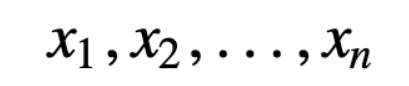

then the equally weighted rolling average for n data points will be essentially the mean of the previous M data-points, where M is the size of the sliding window:

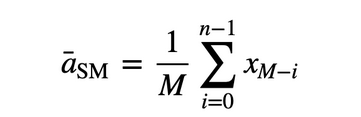

Similarly, for calculating succeeding rolling average values, a new value will be added into the sum, and the previous time period value will be dropped out, since you have the average of previous time periods so full summation each time is not required:

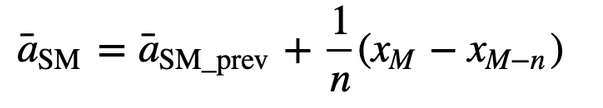

### Cumulative Moving Average (CMA):
Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data. The reason being, it averages out all of the previous data up until the current data point, so an equally weighted average of the sequence of n values: 
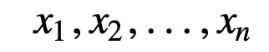

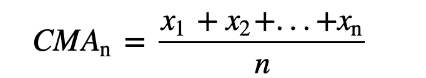

Similarly, to update cumulative average for every new value that comes can be calculated using the below formula: 
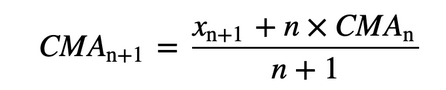

### Exponential Moving Average (EMA):
Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

Enough of theory, right? Let's jump to the practical implementation of the moving average.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../Data/temperature.csv",parse_dates=["datetime"])

In [3]:
df.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [4]:
data=df[["Boston"]]
data.head()

,Boston
0,NaN
1,287.170000
2,287.186092
3,287.231672
4,287.277251


In [5]:
data.shape

(45253, 1)

In [6]:
data.isna().sum()

Boston    3
dtype: int64

In [7]:
data=data.dropna()

In [8]:
data.isna().sum()

Boston    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45250 entries, 1 to 45252
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Boston  45250 non-null  float64
dtypes: float64(1)
memory usage: 707.0 KB


In [10]:
data['SMA3'] = data["Boston"].rolling(window=3).mean()

In [11]:
data['SMA4'] = data["Boston"].rolling(window=4).mean()

In [12]:
data["SMA10"]=data["Boston"].rolling(window=10).mean()

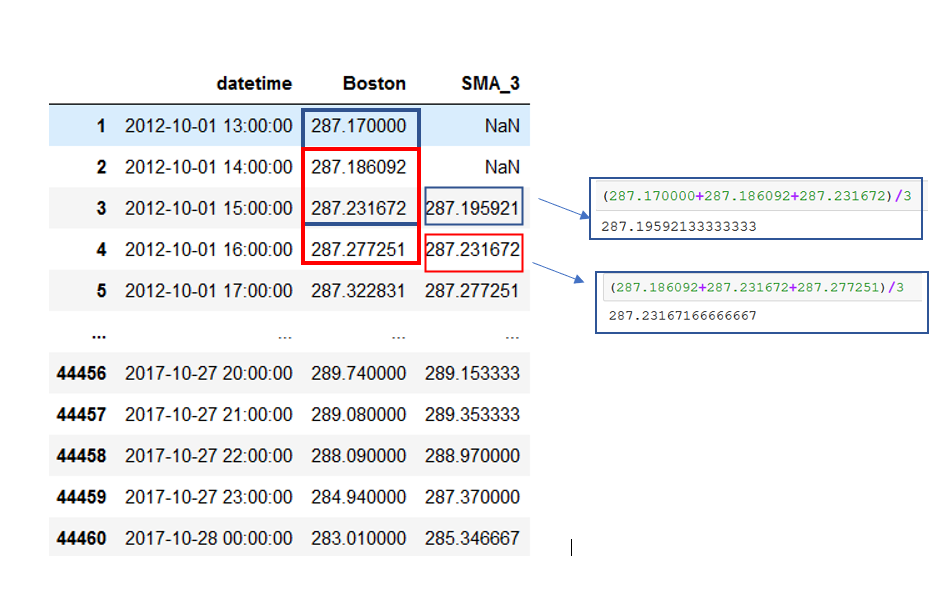

<AxesSubplot:>

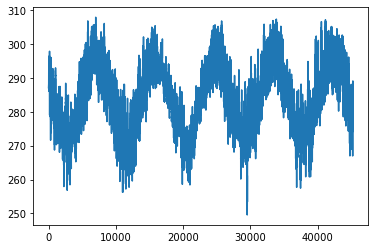

In [13]:
data["Boston"].plot()

In [14]:
(287.186092+287.231672+287.277251)/3

287.23167166666667

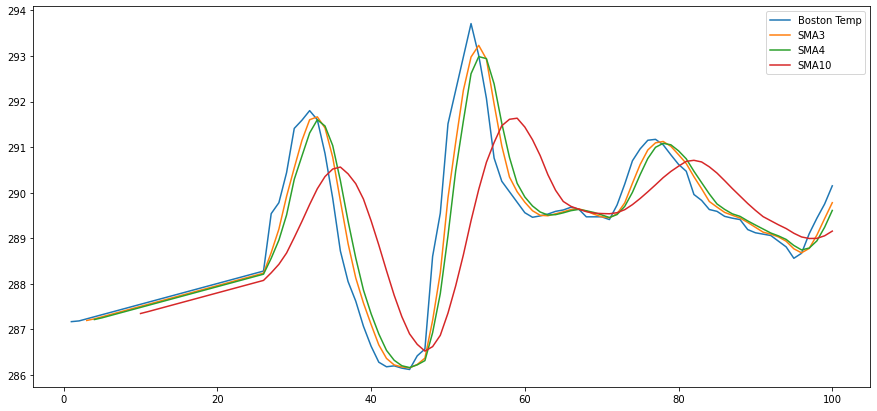

In [15]:
plt.figure(figsize=[15,7])
data_plot=data.head(100)
plt.plot(data_plot["Boston"],label="Boston Temp")
plt.plot(data_plot["SMA3"],label="SMA3")
plt.plot(data_plot["SMA4"],label="SMA4")
plt.plot(data_plot["SMA10"],label="SMA10")
plt.legend()

In [16]:
data.head()

,Boston,SMA3,SMA4,SMA10
1,287.170000,NaN,NaN,NaN
2,287.186092,NaN,NaN,NaN
3,287.231672,287.195921,NaN,NaN
4,287.277251,287.231672,287.216254,NaN
5,287.322831,287.277251,287.254461,NaN


you will use the pandas expanding method fo find the cumulative average of the above data. If you recall from the introduction, unlike the simple moving average, the cumulative moving average considers all of the preceding values when calculating the average.

### Cumulative  Moving Average

In [17]:
data["CMA_3"]=data["Boston"].expanding(min_periods=3).mean()

In [18]:
data["CMA_10"]=data["Boston"].expanding(min_periods=10).mean()

In [19]:
data.head()

,Boston,SMA3,SMA4,SMA10,CMA_3,CMA_10
1,287.170000,NaN,NaN,NaN,NaN,NaN
2,287.186092,NaN,NaN,NaN,NaN,NaN
3,287.231672,287.195921,NaN,NaN,287.195921,NaN
4,287.277251,287.231672,287.216254,NaN,287.216254,NaN
5,287.322831,287.277251,287.254461,NaN,287.237569,NaN


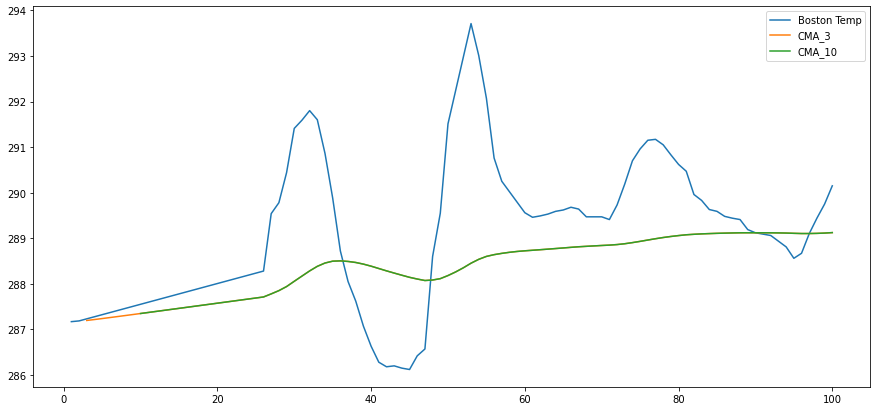

In [20]:
plt.figure(figsize=[15,7])
data_plot=data.head(100)
plt.plot(data_plot["Boston"],label="Boston Temp")
plt.plot(data_plot["CMA_3"],label="CMA_3")
plt.plot(data_plot["CMA_10"],label="CMA_10")
plt.legend()

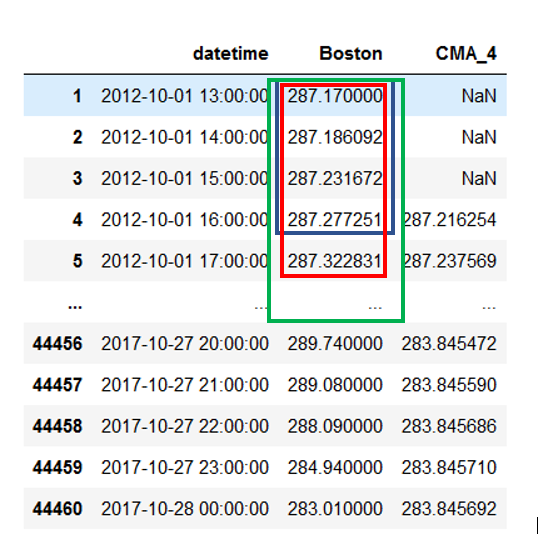

### Exponential Moving Average

In [21]:
data["EMA"]=data["Boston"].ewm(halflife=2).mean()

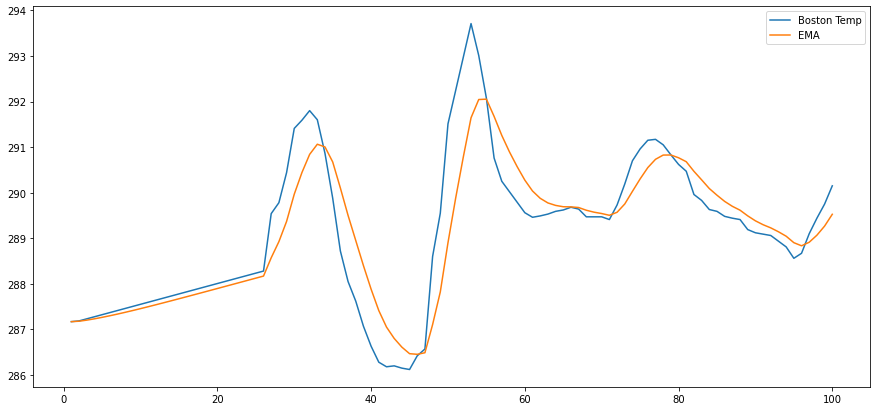

In [22]:
plt.figure(figsize=[15,7])
data_plot=data.head(100)
plt.plot(data_plot["Boston"],label="Boston Temp")
plt.plot(data_plot["EMA"],label="EMA")
plt.legend()

Divide by decaying adjustment factor in beginning periods to account for imbalance in relative weightings (viewing EWMA as a moving average).

    When adjust=True (default), the EW function is calculated using weights wi=(1−α)i

. For example, the EW moving average of the series [x0,x1,...,xt] would be:

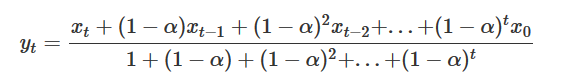

    When adjust=False, the exponentially weighted function is calculated recursively:
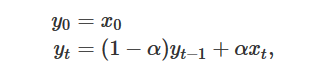

In [23]:
data.head()

,Boston,SMA3,SMA4,SMA10,CMA_3,CMA_10,EMA
1,287.170000,NaN,NaN,NaN,NaN,NaN,287.170000
2,287.186092,NaN,NaN,NaN,NaN,NaN,287.179427
3,287.231672,287.195921,NaN,NaN,287.195921,NaN,287.203098
4,287.277251,287.231672,287.216254,NaN,287.216254,NaN,287.232056
5,287.322831,287.277251,287.254461,NaN,287.237569,NaN,287.264353


In [24]:
help(data["Boston"].ewm)

Help on method ewm in module pandas.core.generic:

ewm(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None) method of pandas.core.series.Series instance
    Provide exponential weighted (EW) functions.
    
    Available EW functions: ``mean()``, ``var()``, ``std()``, ``corr()``, ``cov()``.
    
    Exactly one parameter: ``com``, ``span``, ``halflife``, or ``alpha`` must be
    provided.
    
    Parameters
    ----------
    com : float, optional
        Specify decay in terms of center of mass,
        :math:`\alpha = 1 / (1 + com)`, for :math:`com \geq 0`.
    span : float, optional
        Specify decay in terms of span,
        :math:`\alpha = 2 / (span + 1)`, for :math:`span \geq 1`.
    halflife : float, str, timedelta, optional
        Specify decay in terms of half-life,
        :math:`\alpha = 1 - \exp\left(-\ln(2) / halflife\right)`, for
        :math:`halflife > 0`.
    
        If ``times`` is specified, the time

### Comparing All the values

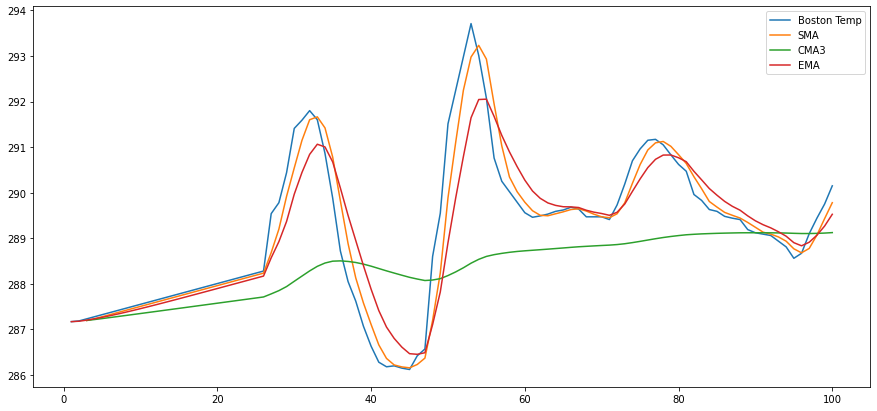

In [25]:
plt.figure(figsize=[15,7])
data_plot=data.head(100)
plt.plot(data_plot["Boston"],label="Boston Temp")
plt.plot(data_plot["SMA3"],label="SMA")
plt.plot(data_plot["CMA_3"],label="CMA3")
plt.plot(data_plot["EMA"],label="EMA")
plt.legend()

Exponential Moving Average (EMA) does a superb job in capturing the pattern of the data while the Cumulative Moving Average (CMA) lacks by a considerable margin.